# Queensland Workers: Cleaning and Analysis 

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.


In [79]:

%matplotlib inline
import pandas as pd
import numpy as np

### allow 'Not Stated' as NaN  ###
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
print('\n')

print(dete_survey['Information'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [80]:
dete_survey.head(20)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [81]:
tafe_survey.info()
print('\n')
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [82]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### Initial Take: Dete_Survey

Many of the columns have complete entries however there almost a quarter with significant percentages missing. 

Columns such as 'Aboriginal' and 'South Sea' firstly are not highly relevant to the questions we are trying to answer and they have over 90% null values. So we will likely remove these columns entirely. 

Otherwise columns such as 'Information', 'Employement Status' and 'Kept Informed' have less than 1% null values and so we can consider removing the rows with null values in these cases after we have done a little bit of inquiry there. 

In [83]:
print(tafe_survey.isnull().sum())


Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [84]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Initial Take: Tafe_Survey

Almost every column in the dataset has null values. We will certainly need to resport to some form of filling in many cases. One may also nbote that the numbers 147 and 265 and 106 come up consistently in the number of null entries per column. We would like to better understand these patterns as they may enable us to more effectively fill or remove. And unlike the dete_survey results, there are not many columns with null values under 1%. In fact of the 700+entries most columns have more that 10% missing. 


## Cleaning: Dropping columns

### Dete_Survey
We will remove a large set of columns that contain almost entrirely null values and are objects rather than boolean. This is becasue boolean nan values are more likely to be implied and thus input. 

In [85]:
### Dropping Columns ###
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)

### Tafe_Survey
We will remove a large set of columns that contain almost entrirely null values and are objects rather than boolean. This is becasue boolean nan values are more likely to be implied and thus input. 

In [86]:
### Dropping Columns ###
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Cleaning: Renaming Columns
Because we eventually want to combine them, we'll have to standardize the column names. Recall that we can use the DataFrame.columns attribute along with vectorized string methods to update all of the columns at once. Here's an example from the last mission:

In [87]:
### Renaming Columns ###

dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace('\s+', ' ').str.replace(' ','_').str.strip()
col_rename={'Record ID': 'id', 'CESSATION YEAR':'cease_date','Reason for ceasing employment': 'separationtype','Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated=tafe_survey_updated.rename(index=str, columns=col_rename)

print(dete_survey_updated.head())
print('\n')
print(tafe_survey_updated.head())


   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

Above we changes relevant column names in each dataset to be the same. We used two different techniques and for the Tufe_survey we only changed the names of the specific columns we want to merge. We will worry about the rest of them in a bit.

In [88]:
print(dete_survey_updated['separationtype'].unique())
print(dete_survey_updated['separationtype'].value_counts())

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [89]:
print(tafe_survey_updated['separationtype'].unique())
print(tafe_survey_updated['separationtype'].value_counts())

['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [90]:
dete_bool=dete_survey_updated['separationtype'].str.contains('Resignation', na=False, regex=True)
dete_resignations=dete_survey_updated[dete_bool]
print(dete_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \


In [91]:
tafe_bool=tafe_survey_updated['separationtype'].str.contains('Resignation', na=False, regex=True)
tafe_resignations=tafe_survey_updated[tafe_bool]
print(tafe_resignations.head())


             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                     

To narrow down our dataset to those who recently resigned for some reason we have selected only the relevant rows in each dataset with signs of resegnation of some kind. 

## Cleaning: Reality Checks

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [92]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64


In [93]:
print(tafe_resignations['cease_date'].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


In [94]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str.get(-1).astype('float')
### DETE_RESIG in FLOAT ###
print(dete_resignations['cease_date'].value_counts().sort_index())

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [95]:
tafe_resignations['cease_date']=tafe_resignations['cease_date'].astype('str')
tafe_resignations['cease_date']=tafe_resignations['cease_date'].str.split('.').str.get(0).astype('float')
### FAFE_RESIG in FLOAT ###
print(tafe_resignations['cease_date'].value_counts().sort_index())


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Now that we have cleaned the cease_date we can see that the dates seem reasonable. None are unlikely or impossible dates.

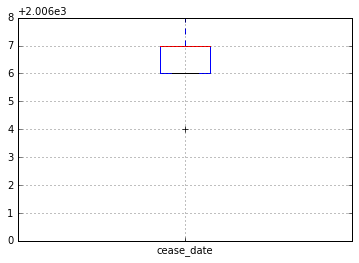

In [96]:
dete_resignations.boxplot(column=['cease_date'])

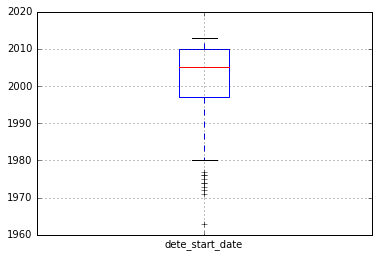

In [97]:
dete_resignations.boxplot(column=['dete_start_date'])

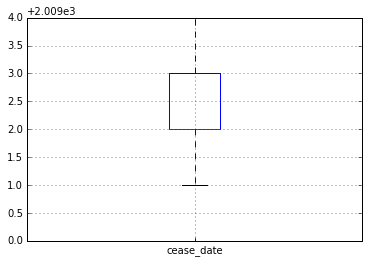

In [98]:
tafe_resignations.boxplot(column=['cease_date'])

Now that we have cleaned and plotted the data for cease_date we can see that the dates seem reasonable. None are unlikely or impossible dates. However we can see that the tafe data is a little bit older than the dete data on average.

2013 and 2012 are the two years that overlap.

In [99]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
id                                     311 non-null int64
separationtype                         311 non-null object
cease_date                             300 non-null float64
dete_start_date                        283 non-null float64
role_start_date                        271 non-null float64
position                               308 non-null object
classification                         161 non-null object
region                                 265 non-null object
business_unit                          32 non-null object
employment_status                      307 non-null object
career_move_to_public_sector           311 non-null bool
career_move_to_private_sector          311 non-null bool
interpersonal_conflicts                311 non-null bool
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_envir

In [100]:
### DROPNA for CEASE_DATE & DETE_START_DATE ###
dete_resignations=dete_resignations.dropna(subset=['cease_date', 'dete_start_date'])

In [101]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 3 to 819
Data columns (total 35 columns):
id                                     273 non-null int64
separationtype                         273 non-null object
cease_date                             273 non-null float64
dete_start_date                        273 non-null float64
role_start_date                        263 non-null float64
position                               270 non-null object
classification                         146 non-null object
region                                 234 non-null object
business_unit                          28 non-null object
employment_status                      273 non-null object
career_move_to_public_sector           273 non-null bool
career_move_to_private_sector          273 non-null bool
interpersonal_conflicts                273 non-null bool
job_dissatisfaction                    273 non-null bool
dissatisfaction_with_the_department    273 non-null bool
physical_work_envir

In [102]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations['institute_service'].value_counts().sort_index())

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64


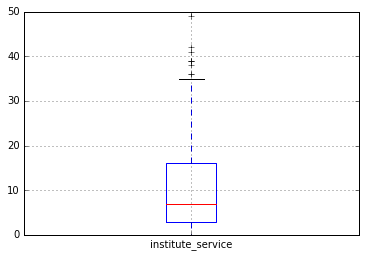

In [103]:
dete_resignations.boxplot(column=['institute_service'])

Taking a look at the new 'institute_service' series we can see that the mean of the series as around 7 years with some long servers up to 49 years. This distribution is possible and quite believable. 

In [104]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [105]:
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())


-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [106]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [107]:
tafe_resignations['Contributing Factors. Job Dissatisfaction']=tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [108]:
tafe_resignations['Contributing Factors. Dissatisfaction']=tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


## Analysis: Developing 'Dissatisfied' Columns

In [109]:
print(tafe_resignations.iloc[:5,10:12])

  Contributing Factors. Dissatisfaction  \
3                                 False   
4                                 False   
5                                 False   
6                                 False   
7                                 False   

  Contributing Factors. Job Dissatisfaction  
3                                     False  
4                                     False  
5                                     False  
6                                     False  
7                                     False  


In [110]:
dis_bool=tafe_resignations.iloc[:,10:12].any(axis=1, skipna=False).copy()
print(dis_bool)
tafe_resignations['dissatisfied']=dis_bool.copy()

### tafe_resignations_up ###
tafe_resignations_up=tafe_resignations

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16       NaN
17      True
18       NaN
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
       ...  
659    False
660    False
661     True
665    False
666    False
669    False
670      NaN
671     True
675     True
676    False
677    False
678    False
679    False
681    False
682    False
683    False
684    False
685     True
686    False
688    False
689     True
690    False
691    False
693    False
694    False
696    False
697    False
698    False
699    False
701    False
Length: 340, dtype: object


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [111]:
# print(dete_resignations.iloc[:,[13,14,15,16,17,18,19,25,26]])
dis_bool=dete_resignations.iloc[:,[13,14,15,16,17,18,19,25,26]].any(axis=1, skipna=False).copy()
print(dis_bool)
dete_resignations['dissatisfied']=dis_bool.copy()

### dete_resignations_up ###
dete_resignations_up=dete_resignations

3      False
5       True
8      False
9       True
11     False
12     False
14      True
20     False
21     False
22      True
23      True
25      True
27     False
33      True
34      True
37     False
40     False
41      True
42     False
43      True
48     False
50     False
51     False
55     False
57     False
61     False
69      True
71     False
87     False
90     False
       ...  
703     True
716     True
726     True
727     True
730     True
731     True
735    False
737    False
744     True
747    False
751     True
752    False
753     True
755    False
762    False
766    False
769    False
771    False
784     True
786     True
789    False
790     True
803    False
804    False
806    False
807     True
808    False
815    False
816    False
819     True
Length: 273, dtype: bool


Above we have used some tools to isolate columns that are relevant to job satisfaction and used the df.any( ) method along with a new 'dissatisfied' column to label each entry a simple True or False regarding their dissatisfaction. 

## Aggregating the datasets


In [112]:
tafe_resignations_up.loc[:,'institute']='TAFE'

dete_resignations_up.loc[:,'institute']='DETE'
dete_resignations_up.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [113]:
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years),dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [114]:
combined=dete_resignations_up.merge(tafe_resignations_up, how='outer', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_dete', '_tafe'), copy=True, indicator=False, validate=None)
combined.head()
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 53 columns):
id                                                                           613 non-null float64
separationtype                                                               613 non-null object
cease_date                                                                   608 non-null float64
dete_start_date                                                              273 non-null float64
role_start_date                                                              263 non-null float64
position                                                                     560 non-null object
classification                                                               146 non-null object
region                                                                       234 non-null object
business_unit                                                                28 non-null object
employment_status  

In [115]:
combined_updated=combined.dropna(axis=1,thresh=500)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 10 columns):
id                   613 non-null float64
separationtype       613 non-null object
cease_date           608 non-null float64
position             560 non-null object
employment_status    563 non-null object
gender               558 non-null object
age                  561 non-null object
institute_service    563 non-null object
dissatisfied         605 non-null object
institute            613 non-null object
dtypes: float64(2), object(8)
memory usage: 52.7+ KB


Above we have combined the two datasets now that we have some relevant columns in each that can merge appropriately to allow us to cross examen the sets. These columsn are most notably 'institute' and 'dissatisfied'.

We then dropped heavily nulled columns to clean up the set to be more manageable.

## Cleaning: 'Institute_service'

In [116]:
combined_updated['institute_service'].head(-5)

0                     7
1                    18
2                     3
3                    15
4                     3
5                    14
6                     5
7                    30
8                    32
9                    15
10                   39
11                   17
12                    7
13                    9
14                    6
15                    1
16                   35
17                   38
18                    1
19                   36
20                    3
21                    3
22                   19
23                    4
24                    9
25                    1
26                    6
27                    1
28                    5
29                   26
             ...       
578                7-10
579                 3-4
580                 1-2
581    Less than 1 year
582    Less than 1 year
583                 1-2
584                 3-4
585                 5-6
586                 NaN
587                 NaN
588             

In [117]:
combined_updated['institute_service']=combined_updated['institute_service'].astype(str)
combined_updated['institute_service']=combined_updated['institute_service'].str.extract(r'([1-9]+)', expand=False).astype(float)
combined_updated['institute_service'].head(-10)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       3.0
8      32.0
9      15.0
10     39.0
11     17.0
12      7.0
13      9.0
14      6.0
15      1.0
16     35.0
17     38.0
18      1.0
19     36.0
20      3.0
21      3.0
22     19.0
23      4.0
24      9.0
25      1.0
26      6.0
27      1.0
28      5.0
29     26.0
       ... 
573     1.0
574     1.0
575     1.0
576     7.0
577     5.0
578     7.0
579     3.0
580     1.0
581     1.0
582     1.0
583     1.0
584     3.0
585     5.0
586     NaN
587     NaN
588     3.0
589     NaN
590     1.0
591     1.0
592     1.0
593     1.0
594     3.0
595     1.0
596     1.0
597     1.0
598     1.0
599     3.0
600     1.0
601     5.0
602     5.0
Name: institute_service, Length: 603, dtype: float64

## Analysis: Mapping years in service to discrete sets

we will build a function that will take the number of years of service and output the appropriate group below.

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [118]:
def service_group(val):
    if pd.isnull(val):
        return 'Unknown'
    elif val>10:
        return 'Veteran'
    elif val>6:
        return 'Established'
    elif val>2:
        return 'Experienced'
    else:
        return 'New'

In [119]:
combined_updated['service_cat']=combined_updated['institute_service'].apply(service_group) 
combined_updated['service_cat'].head(20)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


0     Established
1         Veteran
2     Experienced
3         Veteran
4     Experienced
5         Veteran
6     Experienced
7     Experienced
8         Veteran
9         Veteran
10        Veteran
11        Veteran
12    Established
13    Established
14    Experienced
15            New
16        Veteran
17        Veteran
18            New
19        Veteran
Name: service_cat, dtype: object

In [120]:
combined_updated['institute_service'].head(20)

0      7.0
1     18.0
2      3.0
3     15.0
4      3.0
5     14.0
6      5.0
7      3.0
8     32.0
9     15.0
10    39.0
11    17.0
12     7.0
13     9.0
14     6.0
15     1.0
16    35.0
17    38.0
18     1.0
19    36.0
Name: institute_service, dtype: float64

We have mapped the values as we intended and tested the results from "combined_updated['service_cat']" to see if they indeed match what we expect and they did. 

In [121]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


## Analysis: Visualising service time and dissatisfaction

We now have discrete groups for amount of service provided and so we can start analyzing by looking at the dissatisfaction within each group.

In [122]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    377
True     228
NaN        8
Name: dissatisfied, dtype: int64

In [123]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(value=False)
combined_updated['dissatisfied'].value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


False    385
True     228
Name: dissatisfied, dtype: int64

In [130]:
table = pd.pivot_table(combined_updated, values=['dissatisfied'],index=['service_cat'])
print(table)

             dissatisfied
service_cat              
Established      0.553571
Experienced      0.344828
New              0.285714
Unknown          0.357143
Veteran          0.478632


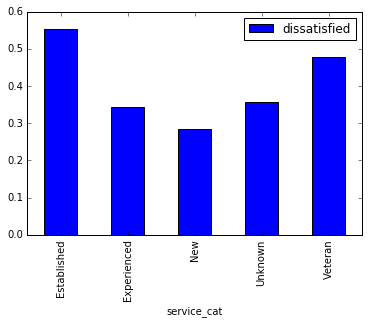

In [134]:
table.plot(kind='bar')

We have aggregated the mean for each service_cat group using a pivot table and through the above bar visualization we can start to unpack some analysis.

Firstly we can see that the percentage of dissatisfied employees increases with time. A third of "New" employees are "Dissatisfied", while over half of "Veteran" and "Established" employees are "Dissatisfied"

# Conclusion and Next Steps

After the short initial analysis we performed and discovered that for time on the job dissatisfaction increased. However this is only the tip of the iceburg. We can do something similar for other groups as well as see differences between DETE and TAFE results:

1. Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
2. Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
3. Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?